<a href="https://colab.research.google.com/github/HanYang-AI/HYAI/blob/main/2_Linear_Regression_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 생선 데이터
## 생선 무게, 길이의 상관관계에 기반해, 키로부터 몸무게를 예측하는 프로그램


In [ ]:
import pandas as pd

df = pd.read_csv('/content/Fish.csv')
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [ ]:
df = df[df['Species']=='Bream']
df.tail()

,Species,Weight,Length1,Length2,Length3,Height,Width
30,Bream,920.0,35.0,38.5,44.1,18.0369,6.3063
31,Bream,955.0,35.0,38.5,44.0,18.0840,6.2920
32,Bream,925.0,36.2,39.5,45.3,18.7542,6.7497
33,Bream,975.0,37.4,41.0,45.9,18.6354,6.7473
34,Bream,950.0,38.0,41.0,46.5,17.6235,6.3705


# x = 생선의 길이, y = 생선의 무게
## 데이터 셋 설정

In [ ]:
x = df['Height']
y = df['Weight']

In [ ]:
import numpy as np
x = np.array(x)
y = np.array(y)

## 데이터 선형적 상관관계 시각화
### x축 길이, y축 몸무게

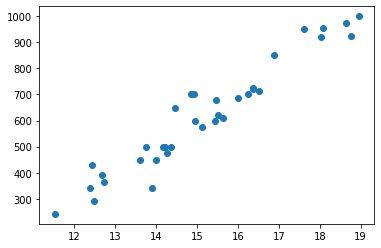

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.show()

# 랜덤한 기울기, 절편 생성

In [ ]:
import numpy as np
w = np.random.randn(1)
b = np.random.randn(1)

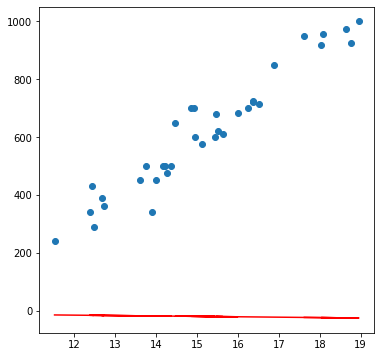

In [ ]:
fig = plt.figure(figsize=(6,6))

plt.scatter(x, y)
plt.plot(x, b + w * x, color = 'red')
plt.show()

# Linear Regression 주요 함수 구현

In [ ]:
def mse(w, b, data):
  yhat = w * x + b
  error = y - yhat
  loss = (error ** 2).mean()
  return error, loss

In [ ]:
def gd(lr, x, x_grad):
  result = x - lr * x_grad
  return result

In [ ]:
def grad(error, data):
  w_grad = -2 * (x * error).mean()
  b_grad = -2 * error.mean()
  return w_grad, b_grad

In [ ]:
print('랜덤한 기울기, 절편: ', w, b)

랜덤한 기울기, 절편:  [-1.40850473] [0.99383917]


In [ ]:
lr = 0.000005
n_epochs = 4000
error_loss = []
for epoch in range(n_epochs):
  error, loss = mse(w, b, x)
  error_loss.append(loss)
  w_grad, b_grad = grad(error, x)
  w = gd(lr, w, w_grad)
  b = gd(lr, b, b_grad)
print('학습 끝난 기울기, 절편: ', w, b)

학습 끝난 기울기, 절편:  [41.47116112] [3.1679463]


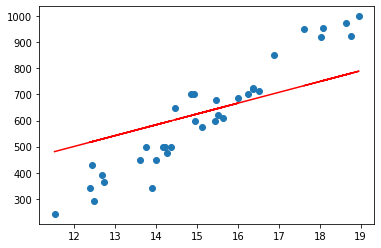

In [ ]:
plt.scatter(x, y)
plt.plot(x, w * x + b, color = 'red')
plt.show()

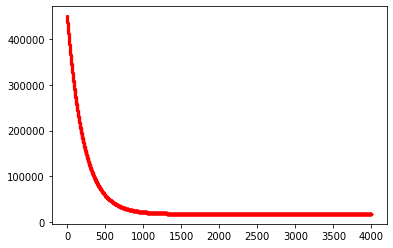

In [ ]:
plt.scatter([i for i in range(n_epochs)], error_loss, s=5, c='r', label='loss')

In [ ]:
def predict(w , b, pred_input):
  pred = float(w * pred_input + b)
  return pred

In [ ]:
pred_in = float(input('생선의 길이를 입력해주세요: '))
print('AI가 예측한 생선의 무게: ', round(predict(w, b, pred_in),2))

생선의 길이를 입력해주세요: 12.6
AI가 예측한 생선의 무게:  525.7
